In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

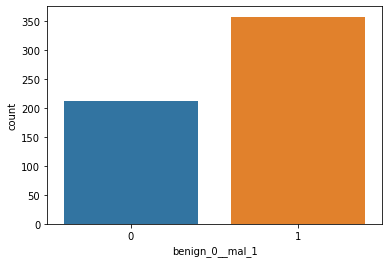

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

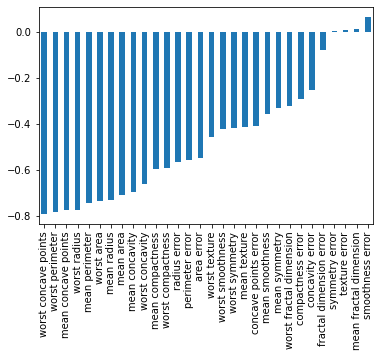

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

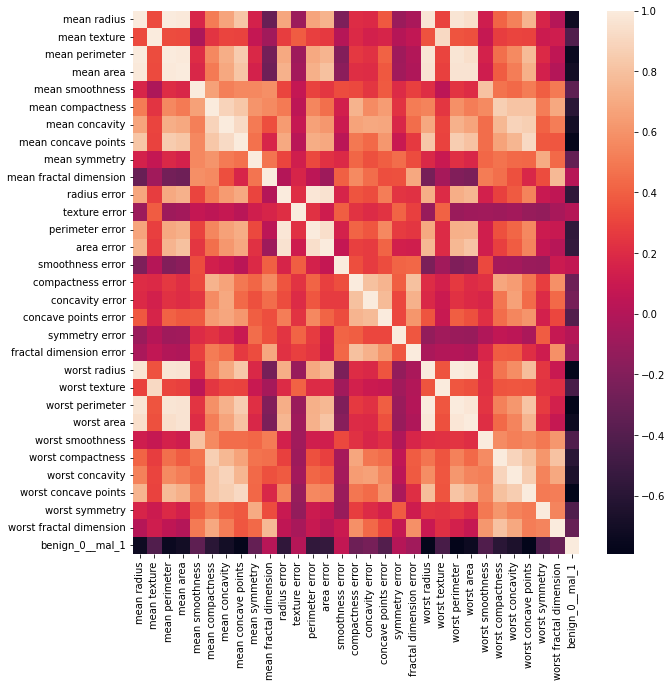

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Dropout

In [23]:
X_train.shape

(426, 30)

In [24]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [25]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6349 - val_loss: 0.5950
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5823 - val_loss: 0.5460
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5364 - val_loss: 0.5014
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4945 - val_loss: 0.4571
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4519 - val_loss: 0.4105
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4083 - val_loss: 0.3673
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3716 - val_loss: 0.3299
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3396 - val_loss: 0.2976
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3145 - val_loss: 0.2702
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2949 - val_loss: 0.2501
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.1082
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0509 - val_loss: 0.1017
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0515 - val_loss: 0.1053
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.1108
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0532 - val_loss: 0.1119
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0495 - val_loss: 0.1048
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.1101
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0516 - val_loss: 0.1136
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0522 - val_loss: 0.1044
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0491 - val_loss: 0.1054
Epoch 93/600


14/14 [==============================] - 0s 3ms/step - loss: 0.0222 - val_loss: 0.1294
Epoch 246/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.1341
Epoch 247/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0228 - val_loss: 0.1329
Epoch 248/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0226 - val_loss: 0.1318
Epoch 249/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.1348
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.1267
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0229 - val_loss: 0.1282
Epoch 252/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.1311
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.1274
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.1327
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.1600
Epoch 408/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0080 - val_loss: 0.1705
Epoch 409/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.1605
Epoch 410/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.1568
Epoch 411/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0079 - val_loss: 0.1616
Epoch 412/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0089 - val_loss: 0.1706
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0093 - val_loss: 0.1611
Epoch 414/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 0.1569
Epoch 415/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.1641
Epoch 416/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.1802
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.2066
Epoch 570/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.2083
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0027 - val_loss: 0.2096
Epoch 572/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.2080
Epoch 573/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 0.2106
Epoch 574/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.2131
Epoch 575/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.2139
Epoch 576/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0027 - val_loss: 0.2083
Epoch 577/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0029 - val_loss: 0.2098
Epoch 578/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.2192
Epoc

In [26]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

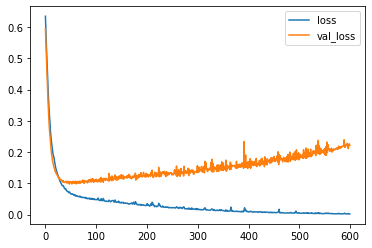

In [27]:
losses.plot()

In [28]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 11ms/step - loss: 0.6920 - val_loss: 0.6733
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6531 - val_loss: 0.6382
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6146 - val_loss: 0.5949
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5682 - val_loss: 0.5446
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5190 - val_loss: 0.4914
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4686 - val_loss: 0.4385
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4150 - val_loss: 0.3864
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3671 - val_loss: 0.3395
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3253 - val_loss: 0.2983
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2910 - val_loss: 0.2681
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.0533 - val_loss: 0.1207
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0584 - val_loss: 0.1084
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0481 - val_loss: 0.1213
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0463 - val_loss: 0.1220
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0459 - val_loss: 0.1098
Epoch 88/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0454 - val_loss: 0.1160
Epoch 89/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0453 - val_loss: 0.1113
Epoch 90/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0441 - val_loss: 0.1183
Epoch 91/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.1144
Epoch 92/600
14/14 [==============================] - 0s 3ms/step - loss: 0.0445 - val_loss: 0.1111
Epoch 93/600


<AxesSubplot:>

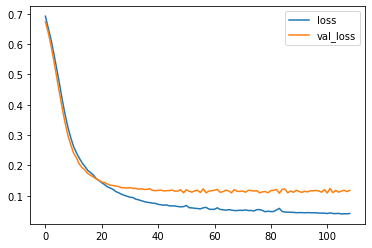

In [32]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [33]:
from tensorflow.keras.layers import Dropout

In [34]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 2s 12ms/step - loss: 0.6996 - val_loss: 0.6840
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6823 - val_loss: 0.6633
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6796 - val_loss: 0.6505
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6518 - val_loss: 0.6367
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6415 - val_loss: 0.6186
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6233 - val_loss: 0.5956
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6057 - val_loss: 0.5688
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5793 - val_loss: 0.5393
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5681 - val_loss: 0.5133
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5293 - val_loss: 0.4833
Epoch 11

14/14 [==============================] - 0s 3ms/step - loss: 0.1245 - val_loss: 0.1077
Epoch 84/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1192 - val_loss: 0.1009
Epoch 85/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1035 - val_loss: 0.1026
Epoch 86/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1233 - val_loss: 0.1015
Epoch 87/600
14/14 [==============================] - 0s 3ms/step - loss: 0.1202 - val_loss: 0.0955
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1163 - val_loss: 0.0945
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1118 - val_loss: 0.0982
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1345 - val_loss: 0.1025
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.1291 - val_loss: 0.1055
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0864 - val_loss: 0.1018
Epoch 93/600


<AxesSubplot:>

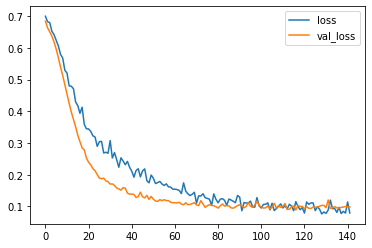

In [36]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
predictions = (model.predict(X_test) > 0.5)*1

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [42]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
